# **Case Telecom X - Previsão de Evasão de Clientes - Parte 2**

A evasão de clientes, conhecida como churn, é um dos principais desafios enfrentados pelas empresas de telecomunicações. Em um mercado altamente competitivo e com ofertas cada vez mais parecidas, reter clientes tornou-se tão ou mais importante do que atrair novos. A saída constante de usuários impacta diretamente a receita recorrente e pode indicar falhas em áreas como qualidade do serviço, atendimento, precificação ou experiência do cliente.

Este notebook da continuidade ao case de previsão de Evasão de clientes no qual neste notebook focarei em desenvolver modelos preditivos capazes de prever quais clientes têm maior chance de cancelar seus serviços.



---

### **Objetivos do Desafio**

* Preparar os dados para a modelagem (tratamento, encoding, normalização).

* Realizar análise de correlação e seleção de variáveis.

* Treinar dois ou mais modelos de classificação.

* Avaliar o desempenho dos modelos com métricas.

* Interpretar os resultados, incluindo a importância das variáveis.

* Criar uma conclusão estratégica apontando os principais fatores que influenciam o churn.

### Importando os pacotes necessários

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns

# Pré-processamento
# Encoding
from sklearn.preprocessing import (
    LabelEncoder,
    OneHotEncoder,
    TargetEncoder,
    OrdinalEncoder,
    MinMaxScaler
)


# Split de Dados
from sklearn.model_selection import train_test_split


#
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modelos
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Métricas
from sklearn.metrics import (
    make_scorer,
    classification_report
)

# importancia das variaveis
from sklearn.inspection import permutation_importance

# Visualizações do sklearn
from sklearn.metrics import(
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    auc,
    average_precision_score
)

from sklearn.metrics import confusion_matrix

from sklearn.inspection import (
     PartialDependenceDisplay
)

# Imputação
from sklearn.impute import (
    SimpleImputer
)


from warnings import filterwarnings
filterwarnings('ignore')

## Importação dos dados processados

Faremos a importação dos dados já tratados da primeira parte do projeto.

In [2]:
dados = pd.read_csv('/content/df_cleaned(1).csv')

In [3]:
dados.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DailyCharges
0,0002-ORFBO,0,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.16
1,0003-MKNFE,0,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.97
2,0004-TLHLJ,1,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.43
3,0011-IGKFF,1,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.22
4,0013-EXCHZ,1,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.76



### **Dicionário de Variáveis**

* `customerID`: número de identificação único de cada cliente

* `Churn`: se o cliente deixou ou não a empresa

* `gender`: gênero (masculino e feminino)

* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos

* `Partner`: se o cliente possui ou não um parceiro ou parceira

* `Dependents`: se o cliente possui ou não dependentes

* `tenure`: meses de contrato do cliente

* `PhoneService`: assinatura de serviço telefônico

* `MultipleLines`: assisnatura de mais de uma linha de telefone

* `InternetService`: assinatura de um provedor internet

* `OnlineSecurity`: assinatura adicional de segurança online

* `OnlineBackup`: assinatura adicional de backup online

* `DeviceProtection`: assinatura adicional de proteção no dispositivo

* ``TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera

* `StreamingTV`: assinatura de TV a cabo

* `StreamingMovies`: assinatura de streaming de filmes

* `Contract`: tipo de contrato

* `PaperlessBilling`: se o cliente prefere receber online a fatura

* `PaymentMethod`: forma de pagamento

* `Charges.Monthly`: total de todos os serviços do cliente por mês

* `Charges.Total`: total gasto pelo cliente

* `DailyCharges`: gasto diário do cliente



In [4]:
# Exibindo informações do dataset
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   int64  
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   int64  
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 


### Remoção de colunas irrelevantes

A coluna **customerID** não tem valor de predição por esse motivo, a coluna será removida do Dataframe antes de seguirmos com a criação dos modelos de machine learning.

In [5]:
# Removendo a coluna 'customerID', com inplace=True
dados.drop(columns=['customerID'], axis= 1, inplace=True)

In [6]:
# Verificando dataset após exclusão da coluna 'customerID'
dados.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,DailyCharges
0,0,Female,0,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.16
1,0,Male,0,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.97
2,1,Male,0,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.43
3,1,Male,1,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.22
4,1,Female,1,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.76


### Verificando a proporção de evasão da variável target

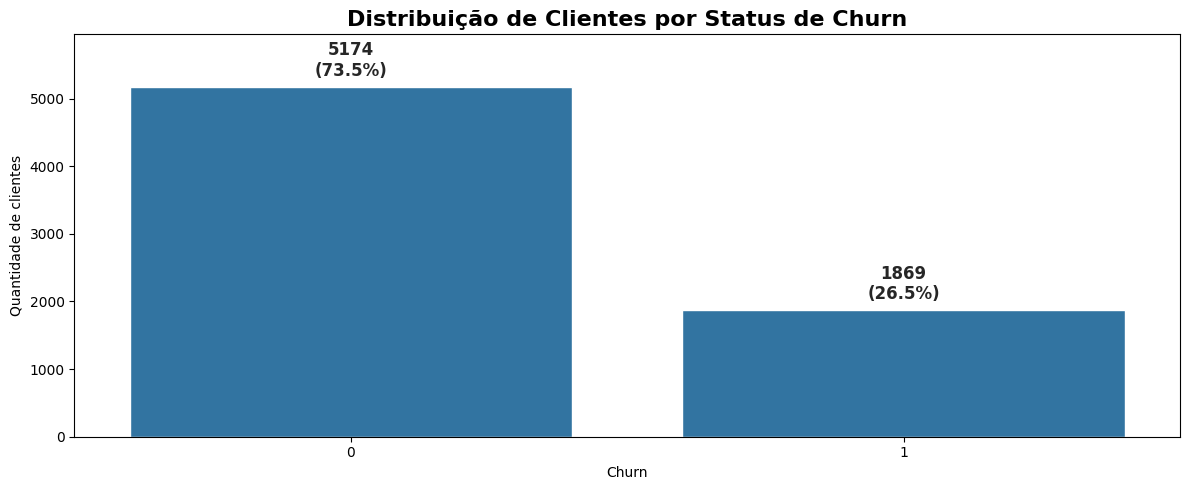

In [7]:
# Cria a figura e o eixo
fig, ax = plt.subplots(figsize = (12, 5))
sns.set_style("darkgrid", {"grid.color": ".5", "grid.linestyle": ":"})

# Ajusta espaço superior para o suptitle
fig.subplots_adjust(top=0.90)

# Definindo a paleta de cores
colors = ["#001F3F", "#AAAAAA", "#334C66", "#7D99A8", "#D0D0D0"]
sns.set_palette(sns.color_palette(colors))
count = dados.Churn.value_counts
sns.countplot(x='Churn', data = dados, ax=ax)
ax.set_xlabel("Churn")
ax.set_ylabel("Quantidade de clientes")
ax.set_title("Distribuição de Clientes por Status de Churn",fontsize=16, fontweight='bold')

# Garantir folga no topo para as anotações
max_height = max(p.get_height() for p in ax.patches)
ax.set_ylim(0, max_height * 1.15)

# Anotações com contagem e porcentagem
total = len(dados)
for p in ax.patches:
    count = int(p.get_height())
    pct = count / total * 100
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    offset = max_height * 0.02  # 2% do valor máximo
    ax.annotate(f'{count}\n({pct:.1f}%)',
                (x, y + offset),
                ha='center',
                va='bottom',
                fontsize=12,
                fontweight='semibold')

plt.tight_layout()
plt.show();


* Como já haviamos observado anteriormente, a variável resposta(**churn**) possui um desbalanceamento entre as classes que deve ser observada poís pode afetar a qualidade dos modelos preditivos. Por isso, faremos aplicação de técnicas de balanceamento como SMOTE ou class_weight por exemplo.

## Análises Direcionadas

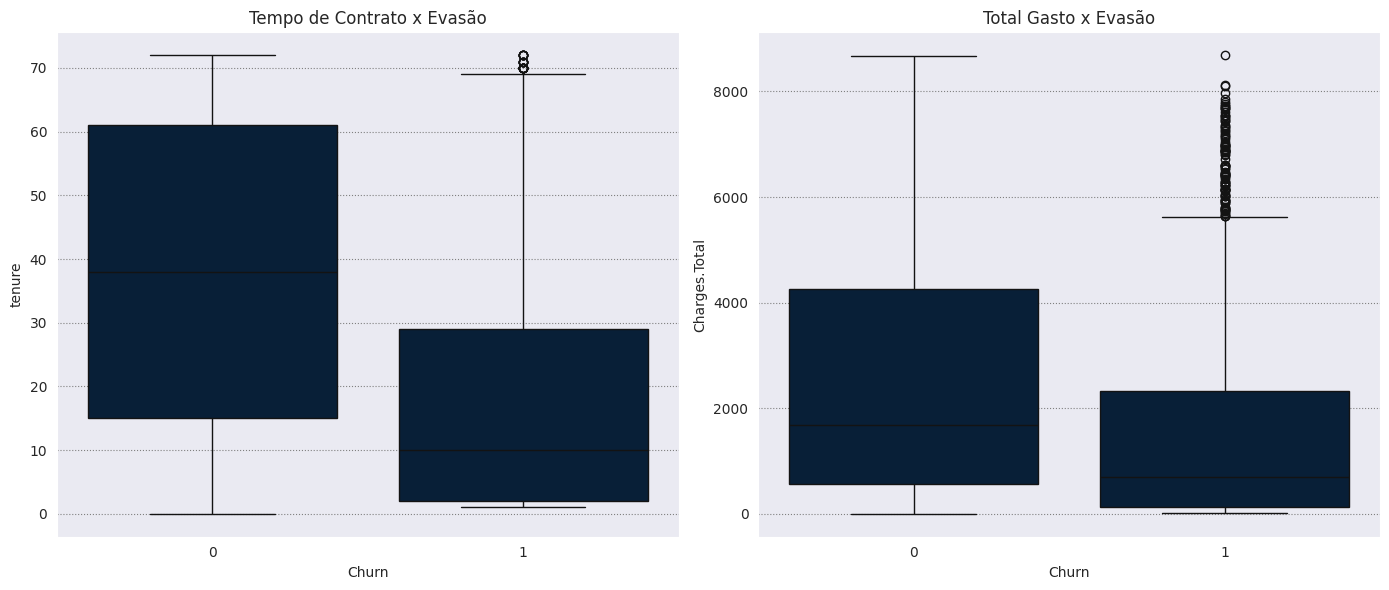

In [8]:
# Criando figura com 1 linha e 2 colunas
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot Tempo de contrato x Evasão
sns.boxplot(data=dados, x="Churn", y="tenure", ax=axes[0])
axes[0].set_title("Tempo de Contrato x Evasão")

# Boxplot Total gasto x Evasão
sns.boxplot(data=dados, x="Churn", y="Charges.Total", ax=axes[1])
axes[1].set_title("Total Gasto x Evasão")

plt.tight_layout()
plt.show()

* Boxplot do Tempo de contrato × Evasão: normalmente, clientes que ficam pouco tempo (tenure baixo) têm maior taxa de churn.

* Boxplot do Total gasto × Evasão: clientes que gastaram menos tendem a ter maior churn.

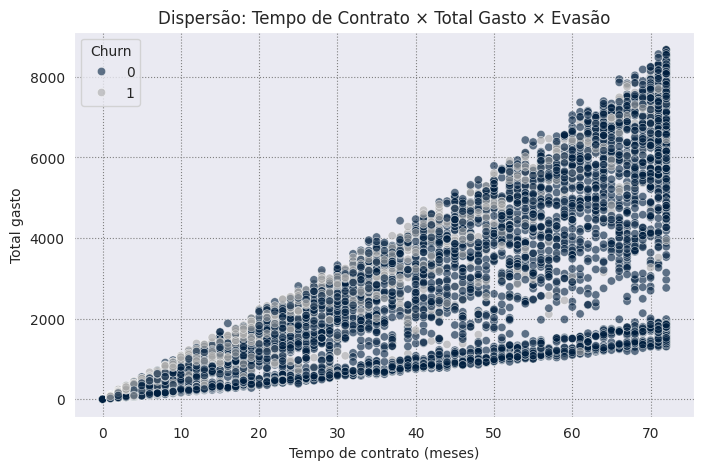

In [9]:
#Gráfico de dispersão
plt.figure(figsize=(8,5))
sns.scatterplot(data=dados, x="tenure", y="Charges.Total", hue="Churn", alpha=0.6)
plt.title("Dispersão: Tempo de Contrato × Total Gasto × Evasão")
plt.xlabel("Tempo de contrato (meses)")
plt.ylabel("Total gasto")
plt.legend(title="Churn")
plt.show()

Como já observado anteriormente, o gráfico de dispersão mostra que conforme o tempo de contrato aumenta, o total gasto também aumenta, mas clientes que abandonam estão concentrados no início.

* Importante dizer que optei por não excluir nenhuma variável na fase exploratoria para poder entender e avaliar o desempenho dos modelos com o conjunto completo de informações. Posteriormente será feita a análise da importancia de variáveis.

### Transformação de variáveis categóricas em booleanas

In [10]:
categorical_cols = dados.select_dtypes(include=["object"]).columns.tolist()

In [11]:
df_encoded = pd.get_dummies(dados, columns=categorical_cols, drop_first=True)

In [12]:
df_encoded

,Churn,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,DailyCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,9,65.60,593.30,2.16,False,True,True,True,...,False,True,True,False,True,False,True,False,False,True
1,0,0,9,59.90,542.40,1.97,True,False,False,True,...,False,False,False,True,False,False,False,False,False,True
2,1,0,4,73.90,280.85,2.43,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
3,1,1,13,98.00,1237.85,3.22,True,True,False,True,...,True,False,True,True,False,False,True,False,True,False
4,1,1,3,83.90,267.40,2.76,False,True,False,True,...,False,True,True,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,13,55.15,742.90,1.81,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
7039,1,0,22,85.10,1873.70,2.80,True,True,False,True,...,False,False,False,True,False,False,True,False,True,False
7040,0,0,2,50.30,92.75,1.65,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
7041,0,0,67,67.85,4627.65,2.23,True,True,True,True,...,True,True,False,True,False,True,False,False,False,True


In [13]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 26 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Churn                                  7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   tenure                                 7043 non-null   int64  
 3   Charges.Monthly                        7043 non-null   float64
 4   Charges.Total                          7043 non-null   float64
 5   DailyCharges                           7043 non-null   float64
 6   gender_Male                            7043 non-null   bool   
 7   Partner_Yes                            7043 non-null   bool   
 8   Dependents_Yes                         7043 non-null   bool   
 9   PhoneService_Yes                       7043 non-null   bool   
 10  MultipleLines_No phone service         7043 non-null   bool   
 11  Mult

### ANÁLISE DE CORRELAÇÃO e MULTICOLINEARIDADE PARA MODELOS LINEARES

Na etapa anterior foi realizada a etapa de análise de correlação onde alem da correlação entre variáveis numéricas usando a correlação de Pearson, também realizei testes estatísticos a fim de medir a correlação entre variáveis categóricas como o teste Chi-quadrado e medimos a força da relação entre essas variáveis com o teste V de Cramér a fim de entender como as variáveis explicativas do dataset se comportam em relação a variável resposta além de observar a correlação entre essas variáveis explicativas.

Neste notebook o foco será a criação e treino de modelos de machine learning por este motivo, seguirei com análise VIF(Variance Inflation Factor) que reforça a análise de correlação já efetuada na primeira parte deste projeto(entre variáveis preditoras).




#### O que é e para que serve o VIF?

* O VIF mede multicolinearidade entre variáveis preditoras.


* Valores altos (geralmente VIF > 5 ou 10) indicam que uma variável é altamente correlacionada com outras e isso pode causar instabilidade e dificultar a interpretação dos coeficientes, principalmente em modelos lineares (como Regressão Logística).


* Modelos baseados em árvore (Random Forest, XGBoost, etc.) não sofrem tanto com multicolinearidade, mas modelos lineares podem ter estimativas enviesadas.

*Resumo geral da análise VIF** (consulta)

| Faixa de VIF       | Interpretação                  |
| ------------------ | ------------------------------ |
| VIF ≈ 1            | Sem multicolinearidade         |
| 1 < VIF < 5        | Baixa (aceitável)              |
| 5 ≤ VIF < 10       | Moderada (acompanhar)          |
| VIF ≥ 10           | Alta (atenção!)                |
| VIF = ∞ (infinito) | Multicolinearidade perfeita ⚠️ |

---


In [14]:
#Selecionar as variáveis independentes
# Aqui, não inclua a variável-alvo (ex: Churn) no cálculo do VIF.
X = df_encoded.drop(columns=['Churn'])

In [15]:
# ================================
#   calcular VIF
# ================================
# Adiciona constante
X_const = sm.add_constant(X)
# Convert boolean columns to integers (0 or 1)
X_const = X_const.astype(float)

vif_data = pd.DataFrame()
vif_data["variável"] = X_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_const.values, i)
                       for i in range(X_const.shape[1])]


In [16]:
# ================================
# 6. Calcular VIF
# ================================
display(vif_data.sort_values(by='VIF', ascending=False))

,variável,VIF
9,PhoneService_Yes,inf
10,MultipleLines_No phone service,inf
3,Charges.Monthly,1.184200e+05
5,DailyCharges,1.177617e+05
12,InternetService_Fiber optic,1.482745e+02
13,InternetService_No,1.042262e+02
19,StreamingMovies_Yes,2.411191e+01
18,StreamingTV_Yes,2.405807e+01
4,Charges.Total,1.080470e+01
2,tenure,7.527613e+00


In [17]:
X_filtrado = X_const.copy()

In [18]:
#Remover variáveis com multicolinearidade perfeita (VIF = inf)

X_filtrado.drop(columns='MultipleLines_No phone service', inplace=True)

In [19]:
#Remover redundâncias fortes entre variáveis numéricas 'DailyCharges'
X_filtrado.drop(columns=["DailyCharges"], inplace=True)

In [20]:
#Recalcular VIF
vif_data = pd.DataFrame()
vif_data["variável"] = X_filtrado.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrado.values, i)
                       for i in range(X_filtrado.shape[1])]

In [21]:
display(vif_data.sort_values(by='VIF', ascending=False))

,variável,VIF
3,Charges.Monthly,865.062147
0,const,628.577799
10,InternetService_Fiber optic,148.263380
11,InternetService_No,104.217482
8,PhoneService_Yes,34.861565
17,StreamingMovies_Yes,24.110253
16,StreamingTV_Yes,24.056827
4,Charges.Total,10.793729
2,tenure,7.527280
9,MultipleLines_Yes,7.273906


In [22]:
#Remover a variável Charges.Total
X_filtrado = X_filtrado.drop(columns=["Charges.Total"])

In [23]:
#Recalcular VIF
vif_data = pd.DataFrame()
vif_data["variável"] = X_filtrado.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrado.values, i)
                       for i in range(X_filtrado.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

,variável,VIF
3,Charges.Monthly,862.660077
0,const,616.702401
9,InternetService_Fiber optic,148.263291
10,InternetService_No,104.133133
7,PhoneService_Yes,34.859709
16,StreamingMovies_Yes,24.105011
15,StreamingTV_Yes,24.052938
8,MultipleLines_Yes,7.270912
13,DeviceProtection_Yes,6.904175
12,OnlineBackup_Yes,6.748448


In [24]:
X_filtrado.drop(columns=["InternetService_No"], inplace=True)

In [25]:
#Recalcular VIF
vif_data = pd.DataFrame()
vif_data["variável"] = X_filtrado.columns
vif_data["VIF"] = [variance_inflation_factor(X_filtrado.values, i)
                       for i in range(X_filtrado.shape[1])]

display(vif_data.sort_values(by='VIF', ascending=False))

,variável,VIF
0,const,31.308484
3,Charges.Monthly,22.356986
9,InternetService_Fiber optic,7.554042
2,tenure,2.784158
17,Contract_Two year,2.610640
15,StreamingMovies_Yes,2.417216
14,StreamingTV_Yes,2.400758
20,PaymentMethod_Electronic check,1.973409
13,TechSupport_Yes,1.850009
21,PaymentMethod_Mailed check,1.840793


In [26]:
# Remove a constante criada no cálculo do VIF
if "const" in X_filtrado.columns:
    X_filtrado = X_filtrado.drop(columns=["const"])

## **Pré-processamento e separação treino/teste**

### Separando variáveis explicativas(x) e variável resposta (y)

In [27]:
# X = features, y = variável alvo (Churn)
X = X_filtrado
y = dados['Churn']

In [28]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   float64
 1   tenure                                 7043 non-null   float64
 2   Charges.Monthly                        7043 non-null   float64
 3   gender_Male                            7043 non-null   float64
 4   Partner_Yes                            7043 non-null   float64
 5   Dependents_Yes                         7043 non-null   float64
 6   PhoneService_Yes                       7043 non-null   float64
 7   MultipleLines_Yes                      7043 non-null   float64
 8   InternetService_Fiber optic            7043 non-null   float64
 9   OnlineSecurity_Yes                     7043 non-null   float64
 10  OnlineBackup_Yes                       7043 non-null   float64
 11  Devi

### TRANSFORMANDO A VARIÁVEL ALVO

In [29]:
# Carregando o LabelEncoder
le = LabelEncoder()

# Aplica o fit_transform no target
y = le.fit_transform(y)

In [30]:
y

array([0, 0, 1, ..., 0, 0, 0])

### Separação em treino e teste - Método Hold-Out

O método é uma técnica de validação de modelos preditivos usada em Estatística, Análise e Ciência de dados que consiste em dividir o conjunto de dados aleatoriamente em dois subconjuntos: um para treinamento e outro para teste. O modelo é treinado no conjunto de treinamento e avaliado no conjunto de teste para verificar seu desempenho em dados não vistos. Essa divisão é importante pois ajuda a evitar o overfitting que ocorre quando o modelo ajusta-se excessivamente aos dados de treinamento e não consegue generalizar o aprendizado a novos dados.


In [31]:
# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2, # 20% dos dados para teste
                                                    random_state=42, # manter a reprodutibilidade
                                                    stratify=y) # manter a proporção da classe desbalanceada no split

### Normalização de variáveis numéricas

Para utilização de modelos como regressão logística optei por realizar a normalização das variáveis numéricas

In [32]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
#Convertendo os dados para o formato DataFrame novamente
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

print(f'Tamanho dos dados de treino: {X_train_scaled.shape}')
print(f'Tamanho dos dados de teste: {X_test_scaled.shape}')

Tamanho dos dados de treino: (5634, 21)
Tamanho dos dados de teste: (1409, 21)


## Modelo Baseline (Dummy Classifier)

Para criar uma **referência mínima de desempenho** o primeiro modelo a ser treinado será o DummyClassifier. Ele estabelece um ponto de comparação inicial: qualquer modelo deve ter desempenho melhor do que o baseline para ser considerado útil.

O uso do modelo baseline (DummyClassifier) é útil para estabelecer um ponto de referência inicial. **Ele permite verificar se os modelos posteriores realmente agregam valor ou se apenas reproduzem previsões triviais, como sempre prever a classe majoritária.**

In [34]:
dummy = DummyClassifier()
dummy.fit(X_train_scaled, y_train)
# Treinamento
dummy.score(X_test_scaled, y_test)

0.7345635202271115

In [35]:
# Predição
y_pred_dummy = dummy.predict(X_test_scaled)

In [36]:
# Avaliação do modelo DummyClassifier
classification_report_dummy = classification_report(
    y_test,
    y_pred_dummy,
    target_names=['No', 'Yes'],
    zero_division=0  # Evita divisão por zero
)

# Exibe o relatório de classificação
print("Relatório de Classificação - DummyClassifier:")
print(classification_report_dummy)

Relatório de Classificação - DummyClassifier:
              precision    recall  f1-score   support

          No       0.73      1.00      0.85      1035
         Yes       0.00      0.00      0.00       374

    accuracy                           0.73      1409
   macro avg       0.37      0.50      0.42      1409
weighted avg       0.54      0.73      0.62      1409



É possível observar que Classe "Yes" (clientes que cancelaram e foco do projeto):
 * Obteve **Recall** = 0.00 (0%) -> o modelo não identifica nenhum cliente que realmente cancelou.
 * **Precision** = 0.00 (0%) -> nunca acerta uma previsão de "Yes".
 * Ou seja, ignora completamente a classe de churn.

 A acurácia foi de 73% o pode parecer alta porem neste caso é ilusória porque o dataset é desbalanceado e esse valor nada mais é que os verdadeiros negativos(churn = "NO") e aproximadamente 27% de churn ="YES" que é a classe de interesse. Logo, prever "No" para todo mundo já garante 73% de acerto, sem esforço.

 Assim como a **Macro avg (média entre classes)** o Recall = 0.50 -> média entre 1.0 ("No") e 0.0 ("Yes"). Isso mostra que o modelo não generaliza para as duas classes.

In [37]:
def plot_confusion_matrix(model, X_test, y_test, title="Matriz de Confusão"):
    """
    Plota a matriz de confusão para um modelo treinado.

    model: modelo já treinado (ex: DummyClassifier, LogisticRegression, etc.)
    X_test: dados de teste (features)
    y_test: rótulos verdadeiros de teste
    title: título do gráfico
    """
    # Fazendo previsões
    y_pred = model.predict(X_test_scaled)

    # Criando a matriz de confusão
    cm = confusion_matrix(y_test, y_pred)

    # Plot
    plt.figure(figsize=(7,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.title(title)
    plt.show()

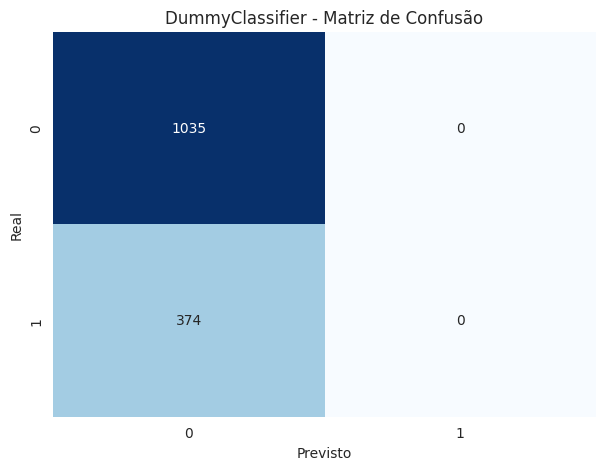

In [38]:
plot_confusion_matrix(dummy, X_test_scaled, y_test, title="DummyClassifier - Matriz de Confusão")

O DummyClassifier está servindo como baseline, claro que ele somente não atende ao objetivo do projeto que é identificar clientes com risco de churn. Por isso, serão treinados modelos mais robustos que devem performar melhor que o modelo baseline sendo capazes de prever a classe de interesse, OU SEJA, os clientes que irão abandonar o serviço(churn = "yes")

Nesse projeto de churn, o recall (sensibilidade) é uma das métricas mais importantes porque:

* O recall mede quantos clientes que realmente dariam churn o modelo conseguiu identificar.

* Quando o recall é baixo, significa que o modelo está deixando passar muitos falsos negativos(aqui 374), ou seja, clientes que estavam prestes a cancelar mas o modelo previu como “não churn”.

### **Impacto de falsos negativos no negócio:**

* Esses clientes em risco não serão alvo de campanhas de retenção -> a empresa perde a oportunidade de agir.

* A perda de clientes impacta diretamente na receita recorrente, podendo gerar grandes prejuízos.

* Muitas vezes, recuperar um cliente perdido é mais caro do que manter um cliente atual, então falhar em identificar os clientes que irão abandonar o serviço pode aumentar custos futuros.

### **Por que avaliar o recall?**

Como este projeto busca identificar clientes com risco de churn, o recall é uma métrica crítica.

**Recall alto** significa que o modelo consegue capturar a maioria dos clientes que realmente estão em risco, permitindo que a empresa atue de forma proativa.

**Recall baixo** significa **muitos falsos negativos**, ou seja, clientes que cancelam mas não foram previstos pelo modelo. Esses casos representariam perda direta de receita e oportunidades de retenção, o que poderia aumentar o o custo de aquisição de novos clientes.

## Regressão Logística

In [39]:
# Modelo de Regressão Logística com balanceamento
logistic_reg_model = LogisticRegression(
    class_weight='balanced', random_state=42, max_iter=1000
)
# treinamento
logistic_reg_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [40]:
# Previsões
y_pred_logistic = logistic_reg_model.predict(X_test_scaled)

In [41]:
# Avaliação do modelo LogisticRegression
classification_report_logistic = classification_report(
    y_test,
    y_pred_logistic,
    target_names=['No', 'Yes'],
    zero_division=0  # Evita divisão por zero
)

# Exibe o relatório de classificação
print("Relatório de Classificação - LogisticRegression:")
print(classification_report_logistic)

Relatório de Classificação - LogisticRegression:
              precision    recall  f1-score   support

          No       0.90      0.73      0.81      1035
         Yes       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.76      1409



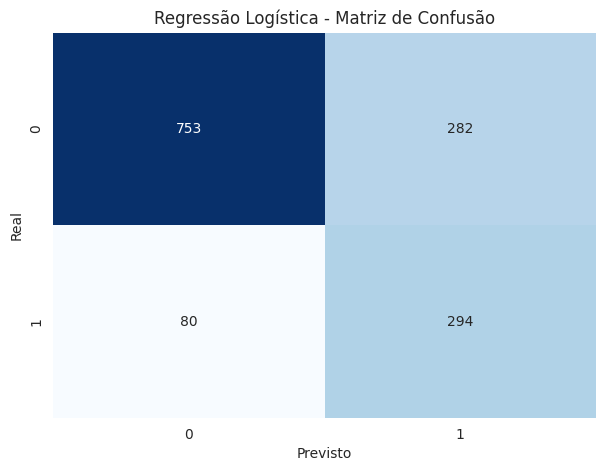

In [42]:
plot_confusion_matrix(logistic_reg_model, X_test_scaled, y_test, title="Regressão Logística - Matriz de Confusão")

O modelo de **Regressão Logística** apresentou bom desempenho em termos de recall para a **classe "Yes" (clientes que cancelam/churn)**, atingindo **0.79**, o que significa que ele consegue identificar a maior parte dos clientes que realmente cancelam.

Por outro lado, o **precision** para a **classe "Yes" foi de 0.51**, indicando que quase metade das previsões de churn foram **falsos positivos** ou seja, o modelo classificou clientes como propensos a cancelar, mas na realidade eles permaneceram.

### **Implicações desse resultado**

* **Ponto positivo:** a empresa terá maior segurança em identificar clientes com risco real de churn, reduzindo a perda de receita.

* **Risco:** com precision baixo, pode haver desperdício de recursos em campanhas de retenção voltadas a clientes que não cancelariam, o que pode gerar custos adicionais desnecessários.

Na prática, este modelo está mais focado em **não deixar passar** clientes que realmente cancelam (alto recall), mas com o custo de apontar falsamente alguns clientes como churn (baixo precision). Dependendo da estratégia de negócio, esse **trade-off** pode ser aceitável (**se o custo de perder clientes for mais alto do que o custo da retenção extra**).

## Decision Tree

O modelo Decision Tree (Árvore de Decisão) funciona como um fluxograma de perguntas e respostas, em que cada divisão (ou “nó”) representa uma condição baseada nos atributos dos dados. A partir dessas divisões sucessivas, o modelo cria caminhos que levam a uma previsão final. Essa estrutura facilita a interpretação, pois é possível visualizar de maneira clara quais variáveis têm maior influência no resultado, além de compreender o raciocínio seguido pelo modelo.

In [43]:
# Modelo Decision Tree com balanceamento
tree_model = DecisionTreeClassifier(
    max_depth=5, # Profundidade máxima da árvore
    class_weight='balanced', # Ajustar os pesos para lidar com desbalanceamento
    random_state=42 #reprodutibilidade
)

In [44]:
# treinamento do modelo de árvore
tree_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [45]:
# Previsões
y_pred_tree = tree_model.predict(X_test_scaled)

In [46]:
# Avaliação do modelo DecisionTree
classification_report_decision_tree = classification_report(
    y_test,
    y_pred_tree,
    target_names=['No', 'Yes'],
    zero_division=0  # Evita divisão por zero
)

# Exibe o relatório de classificação
print("Relatório de Classificação - Decision Tree:")
print(classification_report_decision_tree)

Relatório de Classificação - Decision Tree:
              precision    recall  f1-score   support

          No       0.91      0.70      0.79      1035
         Yes       0.49      0.81      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.74      1409



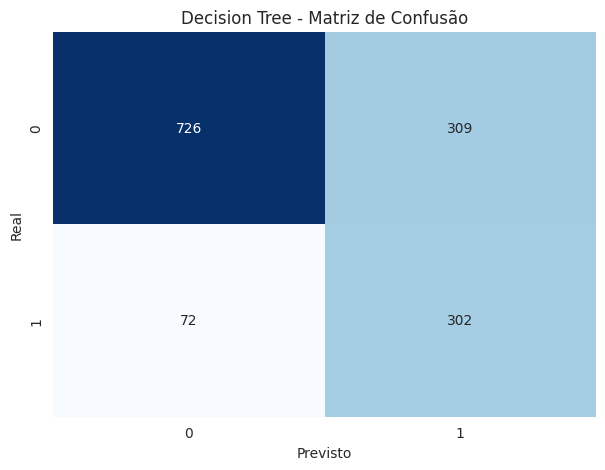

In [48]:
plot_confusion_matrix(tree_model, X_test_scaled, y_test, title="Decision Tree - Matriz de Confusão")

O modelo de Árvore de Decisão apresentou um desempenho com acurácia de 73%, o que indica que, de forma geral, ele foi capaz de classificar corretamente aproximadamente três em cada quatro clientes.

* Para a classe “Yes” (clientes que cancelaram), foco do projeto, nota-se o oposto: o modelo atingiu um recall elevado (0,81), mostrando boa capacidade de identificar clientes propensos ao cancelamento. Entretanto, a precisão foi mais baixa (0,49), indicando que quase metade dos clientes previstos como “Yes” não cancelou de fato.

Esse comportamento sugere que o modelo privilegia a detecção de clientes com maior risco de cancelamento (alto recall em “Yes”), mesmo ao custo de gerar alguns falsos positivos semelhante ao modelo de REGRESSÃO LOGÍSTICA que treinei anteriormente.  

* Esse resultado reforça que essa característica pode ser interessante em **estratégias preventivas de retenção de clientes**, uma vez que pode ser mais valioso identificar potenciais cancelamentos, ainda que com algumas imprecisões, do que deixar de reconhecê-los.

## **Modelo Random Forest**

O Random Forest é um algoritmo de aprendizado supervisionado baseado em um conjunto de árvores de decisão. Diferente do modelo de árvore única, ele combina várias árvores (ensemble learning), reduzindo o risco de overfitting e aumentando a capacidade de generalização do modelo. No contexto deste problema, o Random Forest foi escolhido por sua capacidade de lidar com variáveis categóricas e numéricas, capturar interações complexas entre atributos e oferecer maior estabilidade nos resultados em relação à Decision Tree.


In [50]:
# instanciando o modelo Random Forest
forest_model = RandomForestClassifier(
    max_depth= 5, # Profundidade máxima da árvore
    min_samples_leaf= 5, # Número mínimo de amostras por folha
    min_samples_split= 10, # Número mínimo de amostras para dividir um nó
    n_estimators= 100, # Número de árvores
    class_weight='balanced', # Ajusta pesos devido ao desbalanceamento
    random_state=42 #Reprodutibilidade
)

In [51]:
# Treina o modelo de Random Forest
forest_model.fit(X_train_scaled, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [52]:
# Previsões
y_pred_rf = forest_model.predict(X_test_scaled)

In [53]:
# Avaliação do modelo Random Forest
classification_report_Random_Forest  = classification_report(
    y_test,
    y_pred_rf,
    target_names=['No', 'Yes'],
    zero_division=0  # Evita divisão por zero
)

# Exibe o relatório de classificação
print("Relatório de Classificação - Random Forest:")
print(classification_report_Random_Forest)

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

          No       0.91      0.72      0.81      1035
         Yes       0.52      0.81      0.63       374

    accuracy                           0.75      1409
   macro avg       0.72      0.77      0.72      1409
weighted avg       0.81      0.75      0.76      1409



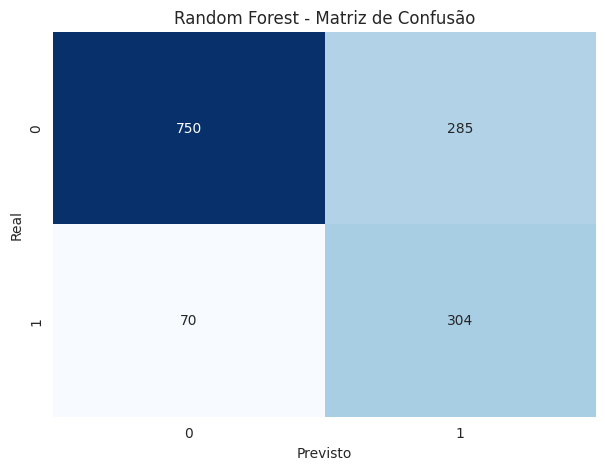

In [54]:
plot_confusion_matrix(forest_model, X_test_scaled, y_test, title="Random Forest - Matriz de Confusão")

O modelo Random Forest apresentou uma acurácia de 75%, mostrando-se competitivo em relação aos modelos anteriores.

Para a classe "No" (não houve churn):

* A precisão foi alta (0.91), o que indica que quando o modelo prevê que um cliente não irá cancelar, ele acerta na grande maioria dos casos.

* Entretanto, o recall foi de 0.72, evidenciando que cerca de 28% dos clientes que realmente não cancelaram não foram corretamente identificados.

**Para a classe "Yes" (houve churn):**

* A precisão foi moderada (0.52), ou seja, pouco mais da metade dos clientes previstos como churn realmente cancelaram.

* O recall foi elevado (0.81), o que significa que o modelo conseguiu identificar a maior parte dos clientes que de fato cancelaram.

Esse desempenho se refletiu em um **F1-score de 0.63**, demonstrando um equilíbrio razoável entre precisão e recall nessa classe.

De forma geral, o Random Forest trouxe um bom equilíbrio ao capturar clientes propensos ao churn (alto recall na classe "Yes"), mesmo que com perda de precisão. Esse resultado pode ser particularmente útil em cenários de negócios em que é preferível identificar o maior número possível de clientes em risco, mesmo correndo o risco de alguns falsos positivos, para direcionar campanhas de retenção como já observado anteriormente.

## **Curva ROC e Precision-Recall**

No contexto do projeto, as curvas ROC e Precision-Recall se tornam ferramentas essenciais. A curva ROC permite analisar a capacidade do modelo em distinguir entre clientes que abandonam e os que não abandonam, considerando a taxa de falsos positivos e verdadeiros positivos.

Já a curva **Precision-Recall** é particularmente útil em situações desbalanceadas, pois foca na precisão das previsões positivas e na capacidade de capturar efetivamente os clientes que realmente irão churnar, oferecendo insights mais realistas sobre a performance do modelo em cenários críticos para o negócio.

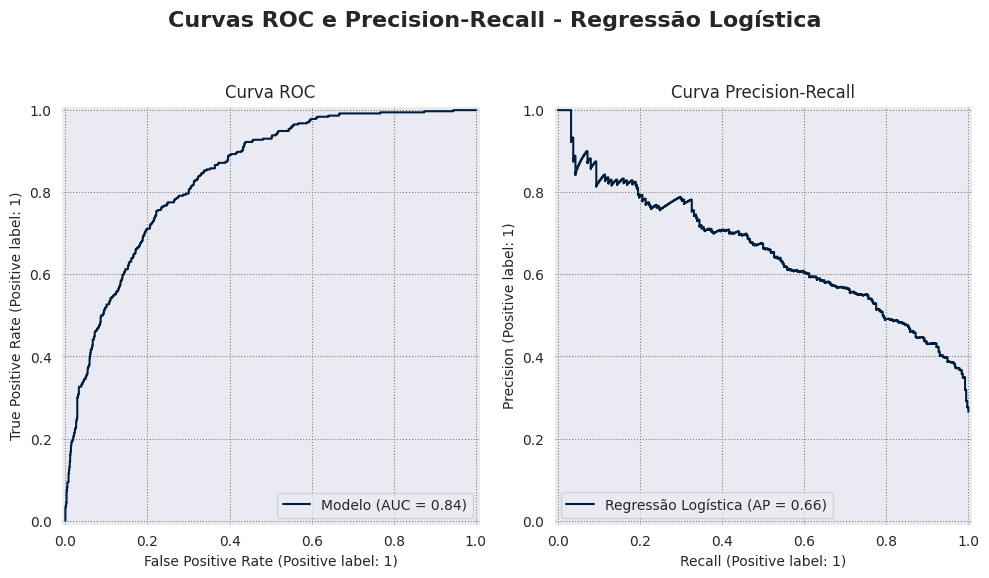

In [63]:
# Probabilidades previstas do modelo
y_proba = logistic_reg_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva (Yes)

# --- Cria figure com subplots ---
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(top=0.85)
fig.suptitle(
            'Curvas ROC e Precision-Recall - Regressão Logística',
            fontsize=16,
            fontweight='bold'
            )

# ROC Curve
roc_disp = RocCurveDisplay.from_predictions(
    y_test, y_proba,
    pos_label=1,
    ax=axes[0],
    name="Modelo"
)
axes[0].set_title("Curva ROC")

# Precision-Recall Curve
pr_disp = PrecisionRecallDisplay.from_predictions(
    y_test, y_proba,
    pos_label=1,
    ax=axes[1],
    name="Regressão Logística"
)
axes[1].set_title("Curva Precision-Recall")

plt.tight_layout()
plt.show()

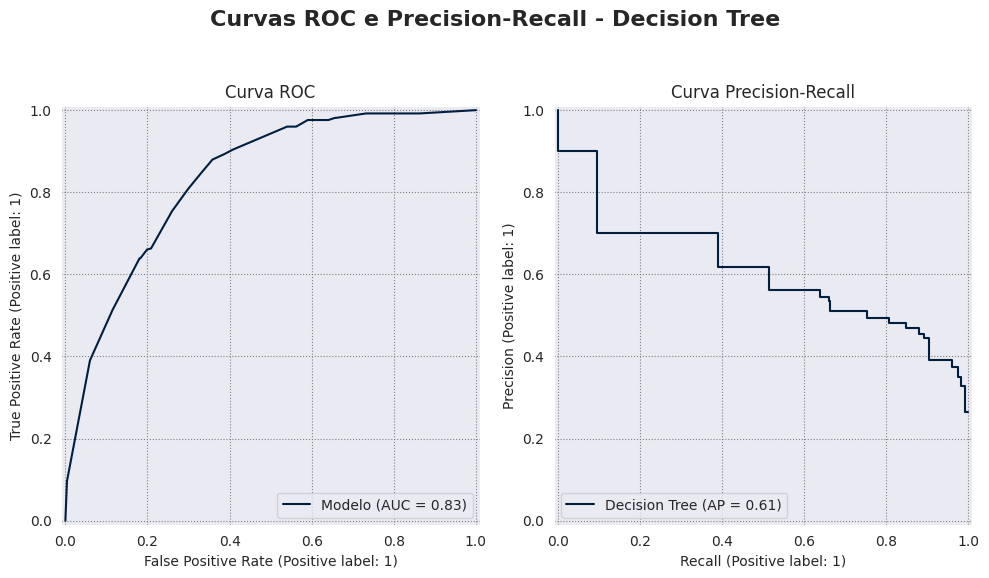

In [64]:

# Probabilidades previstas do modelo
y_proba = tree_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva (Yes)

# --- Cria figure com subplots ---
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(top=0.85)
fig.suptitle(
            'Curvas ROC e Precision-Recall - Decision Tree',
            fontsize=16,
            fontweight='bold'
            )

# ROC Curve
roc_disp = RocCurveDisplay.from_predictions(
    y_test, y_proba,
    pos_label=1,
    ax=axes[0],
    name="Modelo"
)
axes[0].set_title("Curva ROC")

# Precision-Recall Curve
pr_disp = PrecisionRecallDisplay.from_predictions(
    y_test, y_proba,
    pos_label=1,
    ax=axes[1],
    name="Decision Tree"
)
axes[1].set_title("Curva Precision-Recall")

plt.tight_layout()
plt.show()


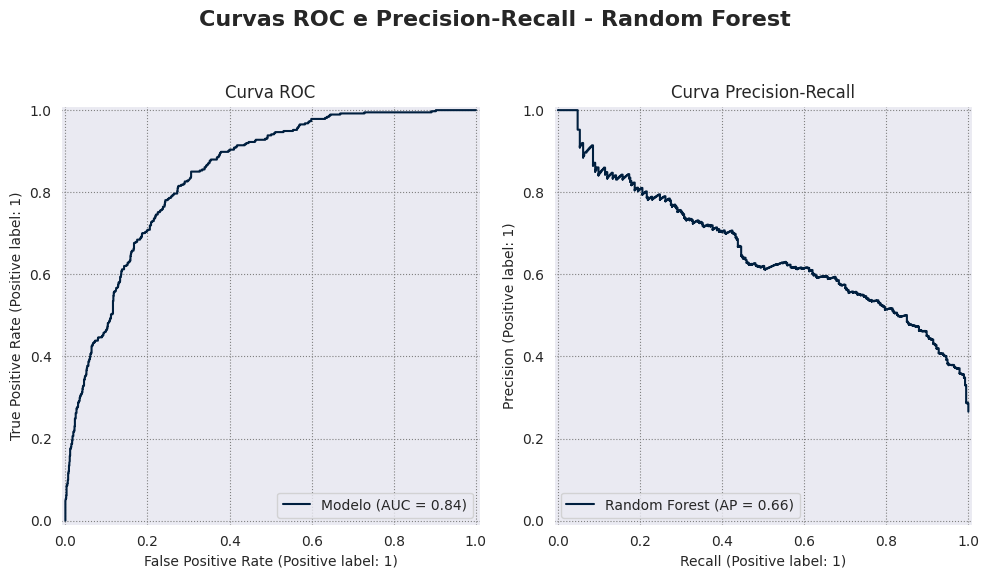

In [65]:
# Probabilidades previstas do modelo
y_proba = forest_model.predict_proba(X_test_scaled)[:, 1]  # Probabilidade da classe positiva (Yes)

# --- Cria figure com subplots ---
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.subplots_adjust(top=0.85)
fig.suptitle(
            'Curvas ROC e Precision-Recall - Random Forest',
            fontsize=16,
            fontweight='bold'
            )

# ROC Curve
roc_disp = RocCurveDisplay.from_predictions(
    y_test, y_proba,
    pos_label=1,
    ax=axes[0],
    name="Modelo"
)
axes[0].set_title("Curva ROC")

# Precision-Recall Curve
pr_disp = PrecisionRecallDisplay.from_predictions(
    y_test, y_proba,
    pos_label=1,
    ax=axes[1],
    name="Random Forest"
)
axes[1].set_title("Curva Precision-Recall")

plt.tight_layout()
plt.show()


#### **Interpretação comparativa com base na curva ROC e Precision recall**

**AUC (capacidade de distinguir churn vs. não churn)**

Todos os modelos tiveram AUC próximo (0.83–0.84), o que significa que eles são capazes de separar os dois grupos de clientes de forma semelhante.

Pequenas diferenças aqui não mudam muito na prática.

**AP (precisão média nas previsões positivas, mais relevante no desbalanceamento)**

**Regressão Logística** e **Random Forest** tiveram desempenho idêntico (0.66), indicando maior confiabilidade ao sinalizar clientes em risco.

A Decision Tree ficou mais baixa (0.61), ou seja, ela erra mais quando prevê churn.

* Minha conclusão para o negócio é que os modelos de Regressão Logística e Random Forest devem ser priorizados visto que tiveram desempenho equivalente (AUC = 0.84 e AP = 0.66) com Recall mais alto, mostrando-se mais adequados para o cenário de churn.

* Mesmo priorizando o Recall neste caso, ainda é necessário que a precisão seja moderada caso contrário pode gerar açoes em clientes que na verdade não iriam cancelar e isso pode gerar custos desnecessários. Neste sentido o **F1-score** é uma métrica importante para avaliação do modelo pois resume o equilíbrio entre essas questões.

## **Análise de Importância das Variáveis**

Para entender como os modelos tomam decisões irei utilizar uma técnica chamada de Permutation Importance que mostra quais variáveis mais impactam a previsão do modelo, de forma mais interpretável refletindo importância real para a predição, já que avalia diretamente o impacto no desempenho.

In [68]:
# Exemplo: supondo que você já tenha seus modelos treinados
# modelo_reglog = ...
# modelo_rf = ...
# X_test, y_test = seus dados separados de teste

# Função para rodar permutation importance e plotar
def plot_permutation_importance(model, X, y, model_name):
    # Calcula a importância
    result = permutation_importance(
        model, X, y,
        n_repeats=10, # número de embaralhamentos (quanto mais, mais estável)
        random_state=42,
        scoring="recall" # pode usar 'accuracy', 'f1', etc., aqui faz sentido recall
    )

    # Cria dataframe para organizar resultados
    importance_df = pd.DataFrame({
        "feature": X.columns,
        "importance_mean": result.importances_mean,
        "importance_std": result.importances_std
    }).sort_values(by="importance_mean", ascending=False)

    # Plot
    plt.figure(figsize=(8,5))
    plt.barh(importance_df["feature"], importance_df["importance_mean"], xerr=importance_df["importance_std"])
    plt.gca().invert_yaxis()
    plt.title(f"Permutation Importance - {model_name}")
    plt.xlabel("Impacto no Recall")
    plt.show()

    return importance_df


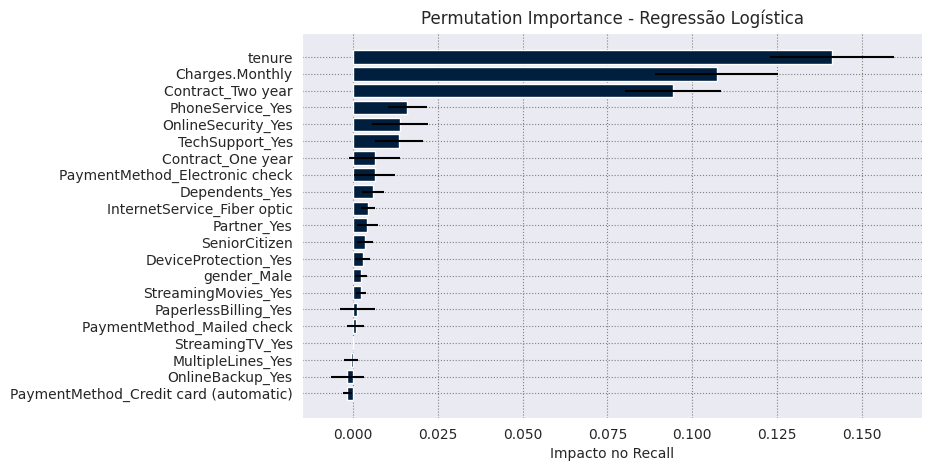

In [69]:
# Para Regressão Logística
importances_reglog = plot_permutation_importance(logistic_reg_model, X_test_scaled, y_test, "Regressão Logística")

No gráfico tenure (tempo de permanência do cliente) e Charges.Monthly (gasto mensal) aparecem como as variáveis mais relevantes, com maior impacto no recall para o modelo de regressão Logística.

* Isso faz muito sentido no problema de churn: clientes novos ou com faturas mais altas tendem a ter maior risco de evasão.

* Variáveis como PhoneService, OnlineSecurity e TechSupport também impactam, mas em menor grau.

* As demais (como gender_Male, StreamingTV, etc.) têm impacto muito baixo ou praticamente nulo.

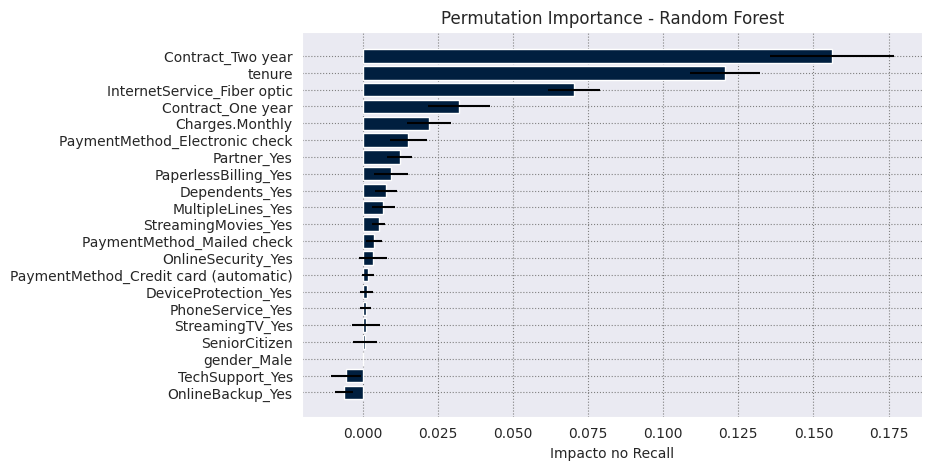

In [70]:
# Para Random Forest
importances_rf = plot_permutation_importance(forest_model, X_test_scaled, y_test, "Random Forest")

Consistência: Ambos confirmam que tempo de permanência e contrato são fatores decisivos no churn.

Diferenças: O Random Forest capta padrões mais complexos e não lineares, por isso elevou a importância do InternetService_Fiber_optic (insatisfação com esse tipo de serviço).

Complementaridade: Usar os dois modelos dá mais robustez à análise, pois combina a interpretabilidade da regressão com a capacidade preditiva e não linearidade do Random Forest.

### Algumas recomendações são:

* Destacar as variáveis com impacto consistente em ambos os modelos (tenure, contrato e gasto mensal).

* Ressaltar variáveis que se destacaram mais em apenas um modelo (ex.: InternetService_Fiber optic no RF e OnlineSecurity na regressão).

* Relacionar os achados com ações de negócio (ex.: clientes novos + fibra ótica + contrato curto → maior risco de churn, logo precisam de estratégias de retenção específicas).

## **Conclusão Geral**

A missão na criação de modelos preditivos é a capacidade de prever quais clientes irão cancelar os serviços e planejar ações que se adiantem a isso.  
O projeto teve como objetivo prever clientes com maior probabilidade de churn para permitir ações de retenção. O modelo de Random Forest apresentou melhor equilíbrio entre recall e precisão, permitindo identificar com segurança clientes em risco.

### **Principais achados do projeto**

O projeto permitiu identificar padrões relevantes no comportamento dos clientes que indicam maior probabilidade de churn. Entre os insights mais significativos, destacam-se:

Clientes com menor tempo de relacionamento (tenure) apresentam maior risco de churn.

Planos ou serviços específicos, como pacotes de internet de fibra óptica ou determinados níveis de assinatura, estão associados a taxas de cancelamento mais altas.

Comportamentos de consumo, frequência de uso e interações com o suporte também demonstraram correlação significativa com o churn.

Esses achados permitem direcionar ações preventivas de retenção, priorizando clientes com maior probabilidade de cancelar.


### **Desempenho do modelo escolhido**

Os modelos com melhor desempenho foram: Random Forest e Regressão Logística, estes apresentaram desempenho consistente na previsão de clientes propensos a churn:

Recall(métrica principal neste projeto): alta capacidade de identificar clientes que realmente cancelariam, permitindo ações preventivas mais eficazes.

Precisão e F1-score: equilíbrio adequado entre falsos positivos e falsos negativos.

AUC-ROC: [ex.: 0.84], indicando bom poder discriminativo do modelo.

Estes modelos mostraram-se robustos e interpretáveis, sendo possível extrair insights das variáveis mais importantes para o negócio.

---

### **Recomendações estratégicas para a empresa**

Com base nos resultados, a empresa pode:

* Implementar campanhas de retenção focadas em clientes de maior risco, como ofertas personalizadas ou upgrades de serviço.

* Priorizar o atendimento proativo de clientes com sinais de insatisfação ou menor engajamento.

* Ajustar políticas de preço e pacotes de serviços considerando o perfil de clientes mais propensos a churn.

Monitorar continuamente métricas de retenção, permitindo ajustes estratégicos rápidos.

Essas ações tem potencial de reduzir a perda de clientes e aumentar a receita recorrente.


### **Limitações do estudo e pontos de atenção**

* Dados disponíveis: o modelo depende da qualidade e abrangência dos dados históricos. Informações faltantes ou comportamentos não registrados podem limitar a precisão.


* Generalização: o modelo foi treinado com dados de um período específico e pode exigir recalibração para novas tendências de comportamento.

* Falsos positivos/negativos: apesar do desempenho satisfatório, há sempre risco de ações incorretas sobre clientes identificados erroneamente.

Essas limitações devem ser consideradas ao implementar estratégias de retenção e ao monitorar continuamente a eficácia do modelo.